# Lab Assignment Two: Exploring Image Data
Name: Marc Pham, Alonso Gurrola

## 1. Business Understanding

The RealWaste dataset comprises 4,752 color images of waste material at the Whyte’s Gully Waste and Resource Recovery facility in Wollongong NSW Australia.  Each image has a resolution of 524x524 and is classified as 1 of 9 possible categories of waste: cardboard, food organics, glass, metal, miscellaneous trash, paper, plastic, textile trash, and vegetation.  For a breakdown of the number of images per category, refer to *Section 2. Data Preparation*.  The data was originally collected for an honors thesis investigating the performance of convolutional neural networks in classifying authentic waste material.  Specifically, the researchers wanted to compare how the CNN would perform when trained on waste in its pure form rather than real waste items.

Our goal is to use this dataset to predict the category of waste that each image falls into.  The prediction algorithm would help environmental agencies, such as the United States’ Environmental Protection Agency (EPA), to automate waste segregation, which is the process of organizing waste into different categories based on their characteristics.  Effective waste segregation is crucial for these agencies to ensure proper recycling and the safe disposal of hazardous materials. As of 2022, waste segregation remains a global challenge, with over 33% of the world’s 2.01 billion tons of solid waste not being properly segregated.  For our prediction algorithm to be effective, the algorithm must minimize the percentage of misclassified waste.  Currently, the highest accuracy achieved by similar algorithms (which classify waste into more than 2 categories) is 77%.  Therefore, our algorithm should achieve an accuracy above 80%, so no more than 20% of the waste is misclassified.

Dataset: [Data](https://archive.ics.uci.edu/dataset/908/realwaste)

Original Paper: [RealWaste: A Novel Real-Life Data Set for Landfill Waste Classification Using Deep Learning](https://www.mdpi.com/2078-2489/14/12/633)

Waste Segregation Statistics: [The Importance of Waste Segregation](https://axil-is.com/blogs-articles/waste-segregation/#:~:text=Environmental%20Problems&text=However%2C%20at%20least%2033%25%20of,no%20longer%20afford%20to%20ignore)

Accuracy of Previous Algorithms: [Previous Algorithms](https://www.sciencedirect.com/science/article/pii/S2212095523000792#:~:text=ML%20is%20used%20for%20efficient,waste%20prediction%20and%20classification%20accuracy)

## 2. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 
from PIL import Image
import time

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
data_path = "RealWaste_data/"
os.chdir(data_path)

To prepare the data, we read in the images as numpy arrays. The images are already the same size (512x512) and are represented with RGB colors.  We then linearized the images to create a table of 1-D image features.

Time: 45.4241 seconds


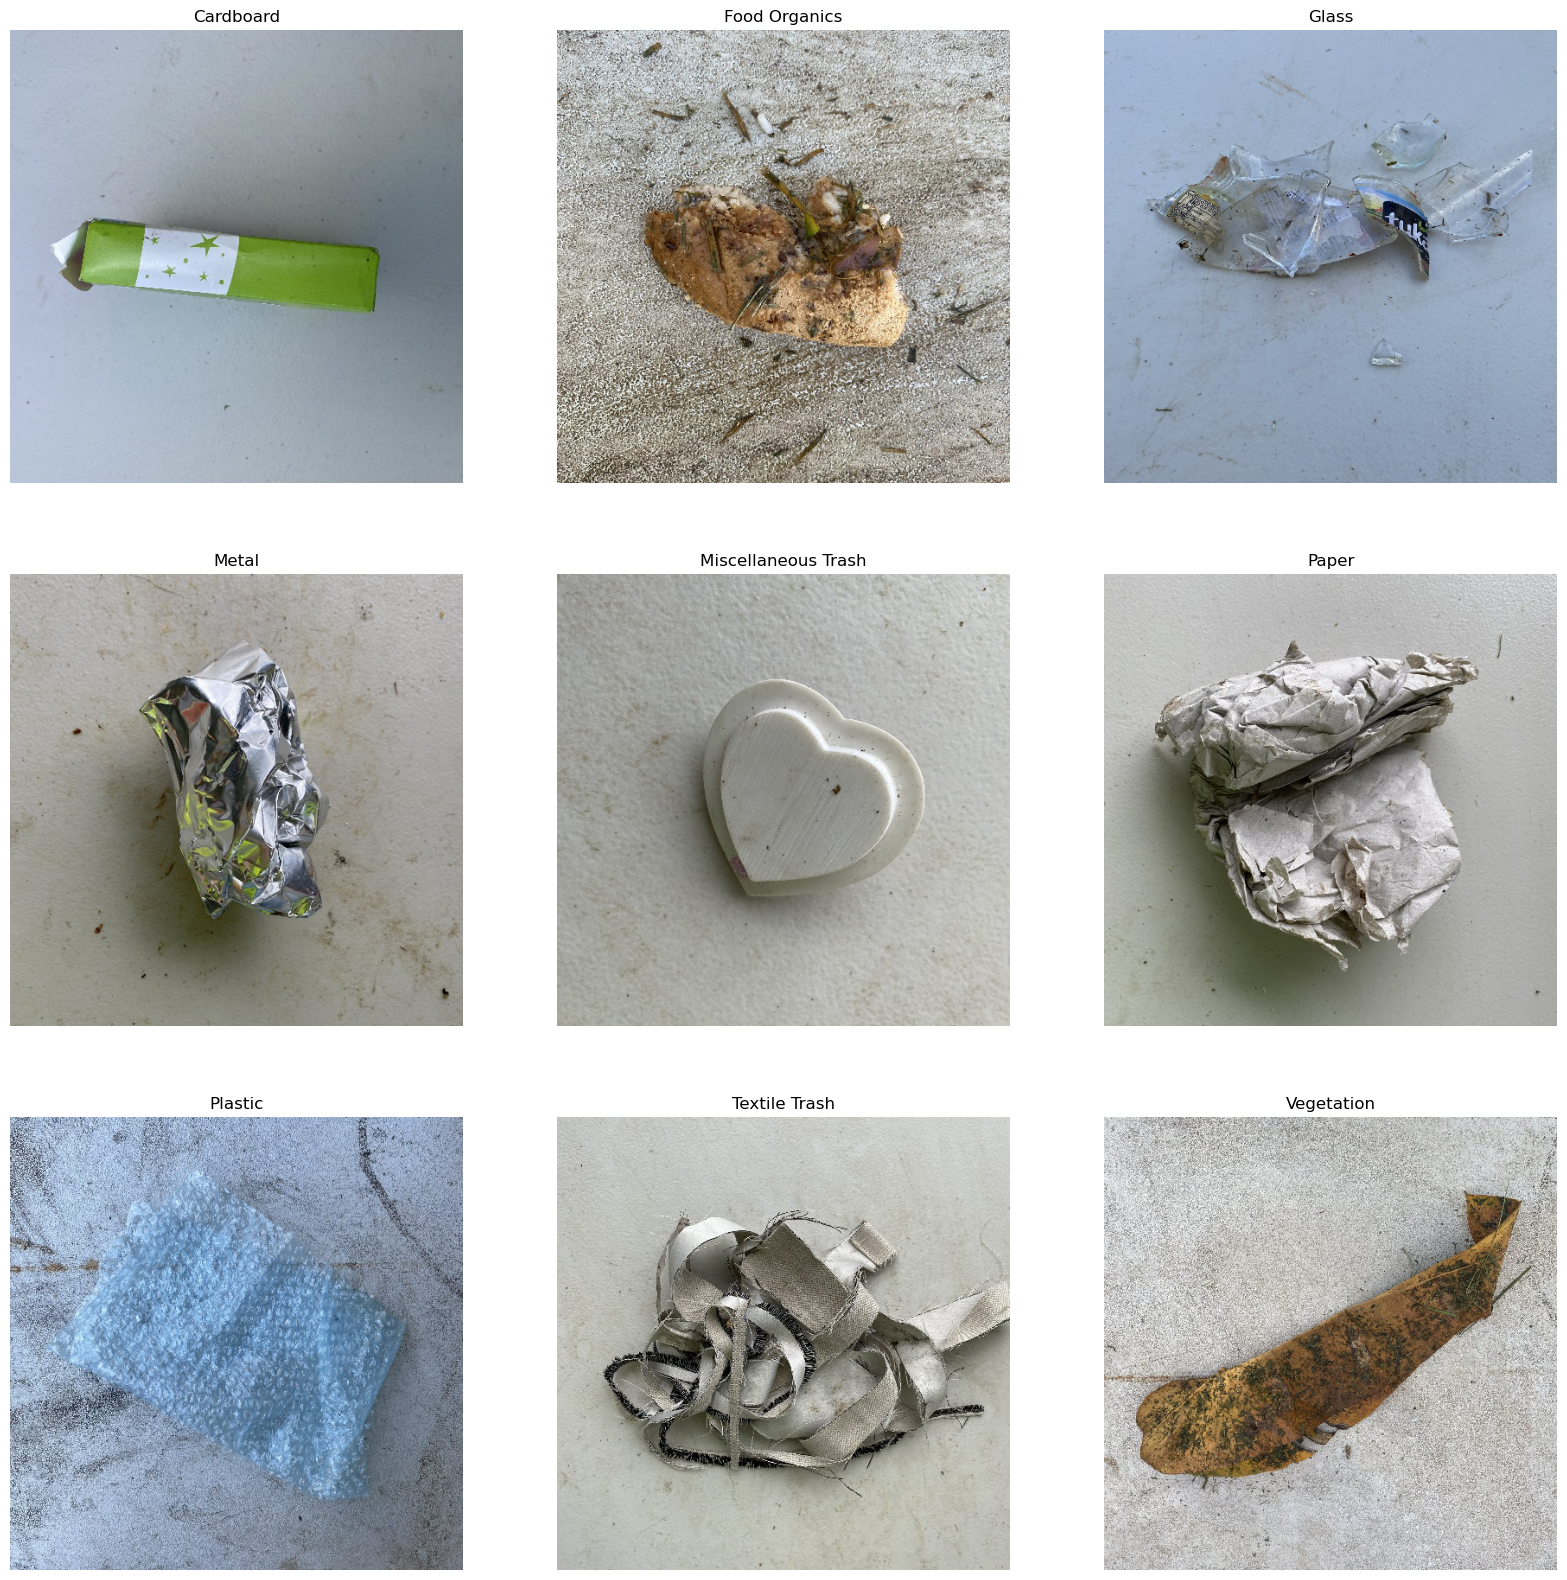

In [24]:
start = time.time()

num_jpgs = []
data_set = []

fig = plt.figure(figsize=(20,20))
count = 1

# Remove any hidden files
categories = sorted(os.listdir())
for i in range(len(categories) - 1, -1, -1):
    if categories[i][0] == '.':
        categories.pop(i)

for category in categories:
    
    os.chdir(category)
    num_jpgs.append(len(os.listdir()))

    printt = True
    
    for img_name in os.listdir():

        # Read in the images as numpy arrays, then linearize them.
        img = Image.open(img_name)
        numpydata = np.array(img)
        data_set.append(numpydata.ravel())
        img.close()

        # Output 1 Image from each of the Categories.
        if printt:
            ax = fig.add_subplot(3, 3, count)
            plt.imshow(numpydata)
            plt.axis('off')
            plt.title(category)
            count += 1
            printt = False

    os.chdir("../")

np_data = np.array(data_set)

end = time.time()
print(f"Time: {(end-start):.4f} seconds")

In [21]:
labels = np.repeat([i for i in range(1,10)], num_jpgs)
Labels = pd.DataFrame()
Labels['Labels'] = categories
Labels['Number of Label'] = [i for i in range(1,10)]
Labels['Number of Occurrences'] = num_jpgs
print(f"Total Number of Occurrences: {len(labels)}")
Labels

Total Number of Occurrences: 4752


Labels  Number of Label  Number of Occurrences
0            Cardboard                1                    461
1        Food Organics                2                    411
2                Glass                3                    420
3                Metal                4                    790
4  Miscellaneous Trash                5                    495
5                Paper                6                    500
6              Plastic                7                    921
7        Textile Trash                8                    318
8           Vegetation                9                    436

## 3. Data Reduction